In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

print("Dataset Head:")
print(df.head())

Dataset Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
# Step 3: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

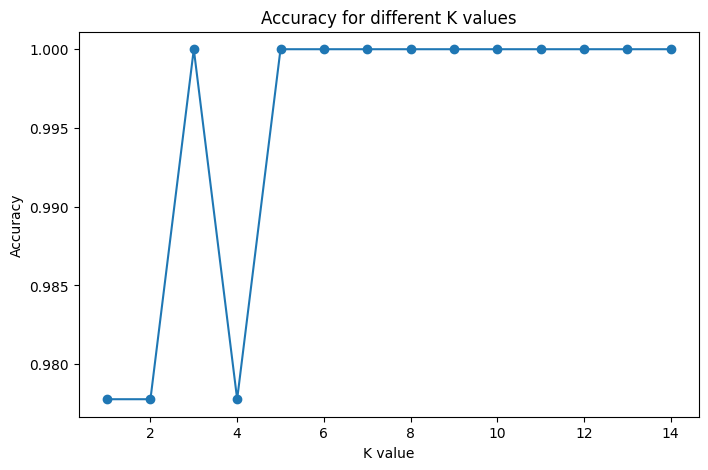

In [6]:
# Step 5: Experiment with different K values
accuracies = []
k_values = range(1, 15)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy for different K values")
plt.show()

In [7]:
# Step 6: Best K
best_k = k_values[np.argmax(accuracies)]
print(f"Best K value: {best_k} with accuracy: {max(accuracies):.2f}")


Best K value: 3 with accuracy: 1.00


In [8]:
# Step 7: Train with best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


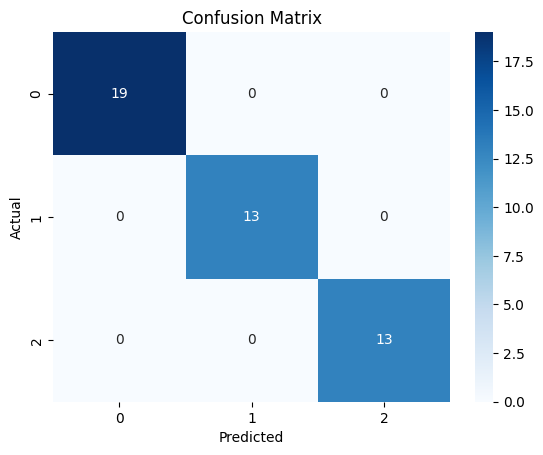


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [9]:
# Step 8: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))